**Import Libraries**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import math
from scipy.stats import entropy as en
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler

# Xcel to csv


In [27]:
CollectedData_Xcel= pd.read_excel('CollectedData.xlsx')
 
#print(CollectedData_Xcel.head())
CollectedData_Xcel.to_csv ("CollectedData.csv", index = None, header=True)
CollectedData_csv = pd.read_csv("CollectedData.csv")
#print(CollectedData_csv.head())
CollectedData_csv=CollectedData_csv.rename(columns={CollectedData_csv.columns[2]:'Age',CollectedData_csv.columns[7]:'AMV',CollectedData_csv.columns[21]:'Clo',CollectedData_csv.columns[18]:'Met',CollectedData_csv.columns[25]:'Dewpt',CollectedData_csv.columns[26]:'PlaneRadTemp',CollectedData_csv.columns[36]:'Ta',CollectedData_csv.columns[37]:'Tmrt',CollectedData_csv.columns[39]:'Vel',CollectedData_csv.columns[41]:'AirTurb',CollectedData_csv.columns[42]:'Pa',CollectedData_csv.columns[43]:'Rh',CollectedData_csv.columns[73]:'TaOutdoor',CollectedData_csv.columns[76]:'RhOutdoor',CollectedData_csv.columns[48]:'PMV'})
#CollectedData_csv.info()


***Part A. Preprocessing***

In [ ]:
Selecting_the_data = pd.DataFrame(CollectedData_csv, columns=['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV'])
#print(Selecting_the_data)
DataType = Selecting_the_data.dtypes
print('-------Data type of each column of Dataframe :------')
print(DataType)
print('---------NUMBER OF NULLS IN EACH COlumn---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].isna().sum())


print('---------Find min---------')

print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].min())
print('---------Find max---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].max())
print('---------Find varience---------')
print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].var())

print('---------Find STD---------')

print(CollectedData_csv[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].std())
print("\n----------- Calculate Mean -----------\n")
print(Selecting_the_data.mean())
 
print("\n----------- Calculate Median -----------\n")
print(Selecting_the_data.median())
 
print("\n----------- Calculate Mode -----------\n")
print(Selecting_the_data.mode())

print("\n----------- Calculate Outliers -----------\n")
for i in range(0,15):
  Outliers=Selecting_the_data[Selecting_the_data.columns[i]].dropna()
  stats=boxplot_stats(Outliers)
  print(len(set(stats[0]['fliers'])))

-------Data type of each column of Dataframe :------
Age             float64
Clo             float64
Met             float64
Dewpt           float64
PlaneRadTemp    float64
Ta              float64
Tmrt            float64
Vel             float64
AirTurb         float64
Pa              float64
Rh              float64
TaOutdoor       float64
RhOutdoor       float64
AMV             float64
PMV             float64
dtype: object
---------NUMBER OF NULLS IN EACH COlumn---------
Age              225
Clo             6889
Met               57
Dewpt           7021
PlaneRadTemp    6889
Ta              3701
Tmrt            3228
Vel             7004
AirTurb         4655
Pa                35
Rh                45
TaOutdoor         19
RhOutdoor         20
AMV               51
PMV             1389
dtype: int64
---------Find min---------
Age             -1.000000
Clo             15.960000
Met              0.000000
Dewpt           -7.420000
PlaneRadTemp    16.410000
Ta              16.610000
Tmrt         

# **Histogram & Box PLOT** 


-----HISTOGRAM--------



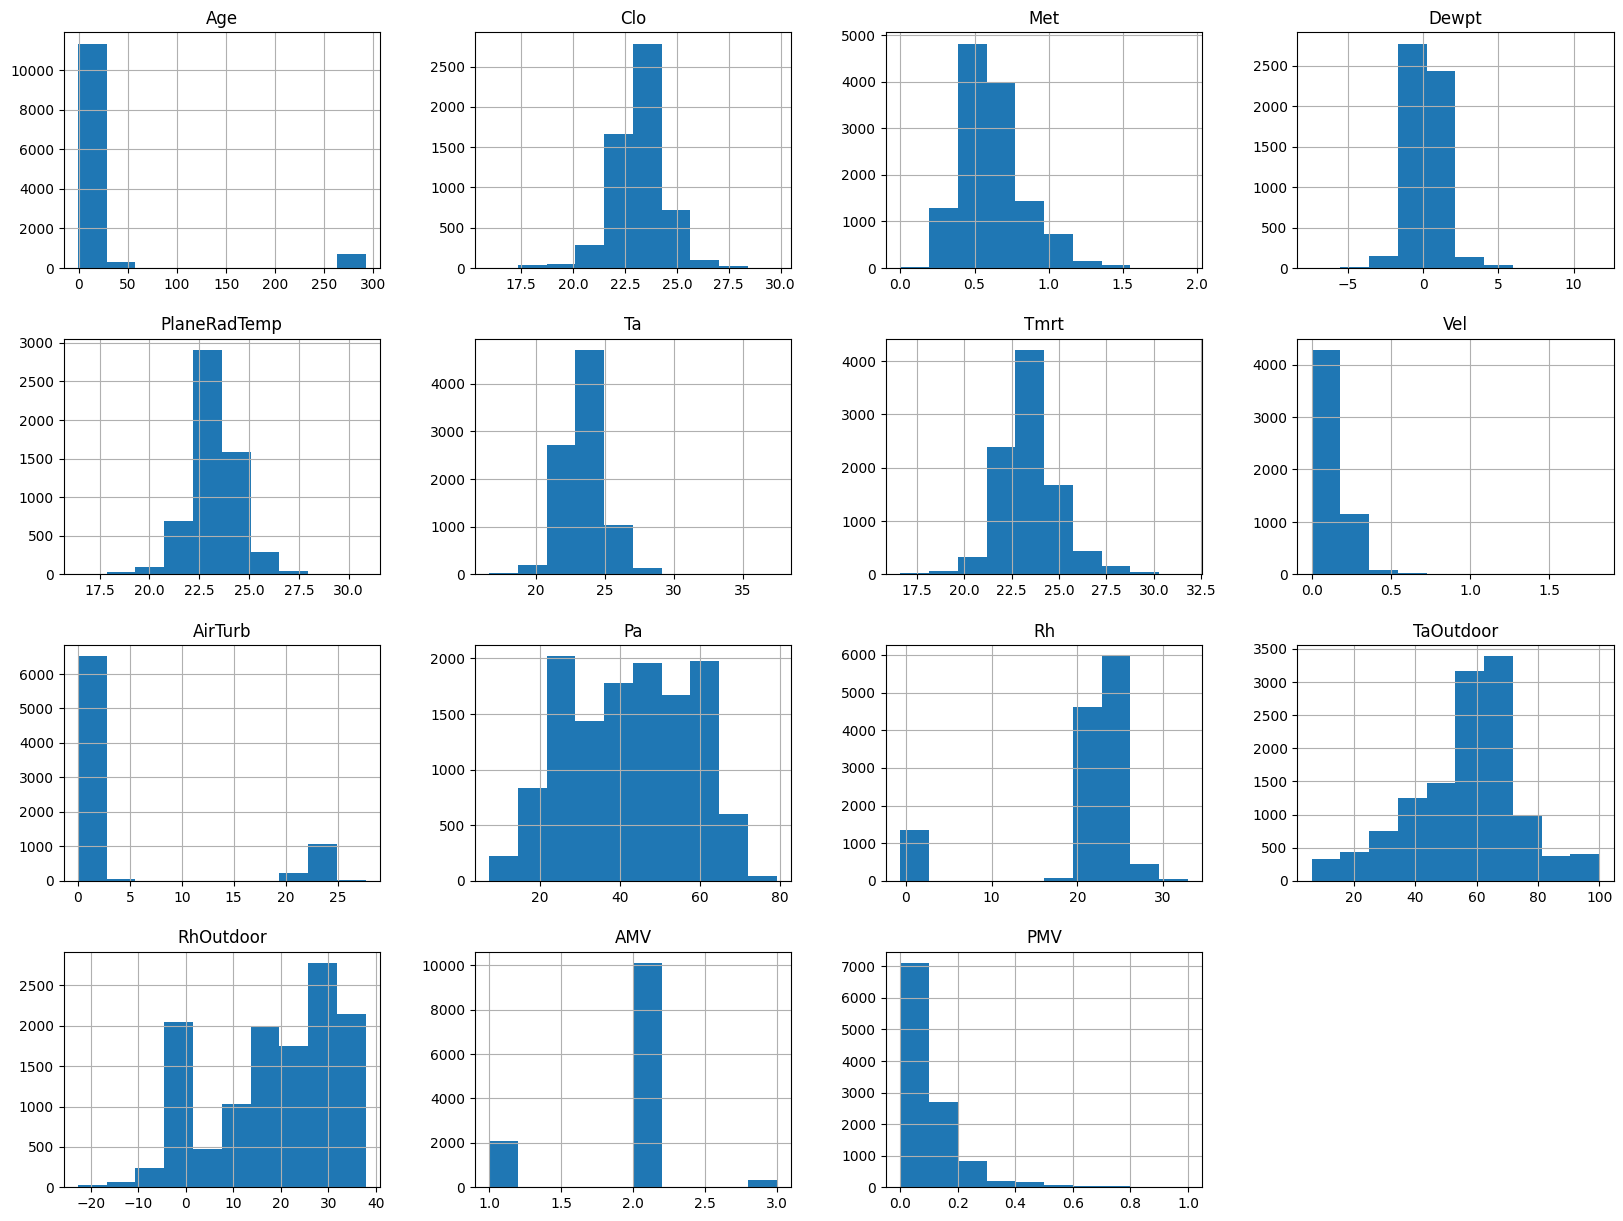


-----BoxPlot--------





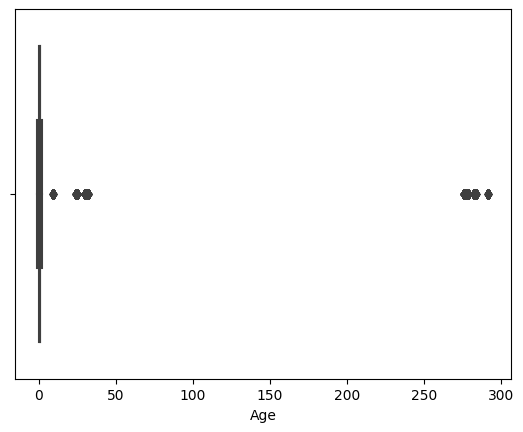

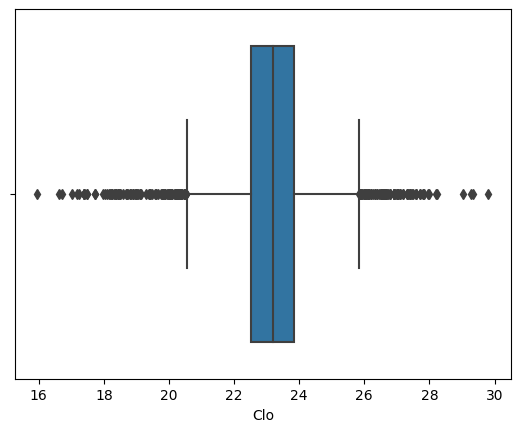

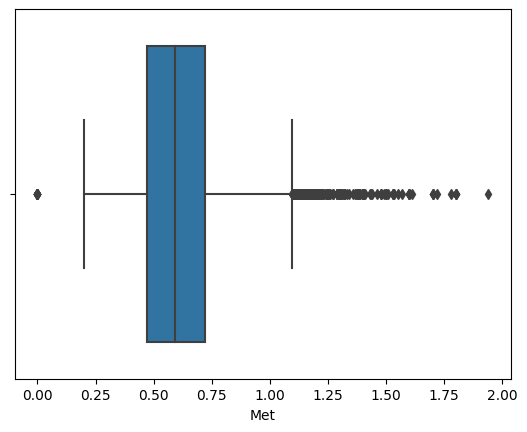

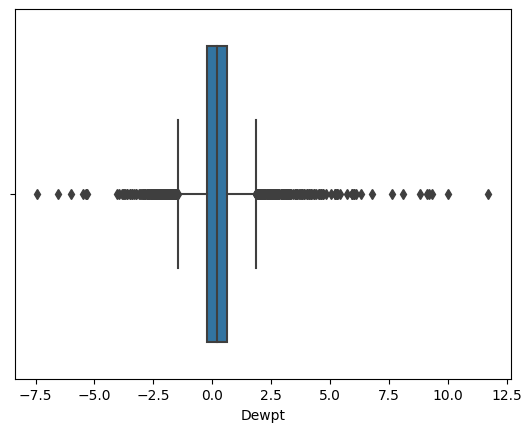

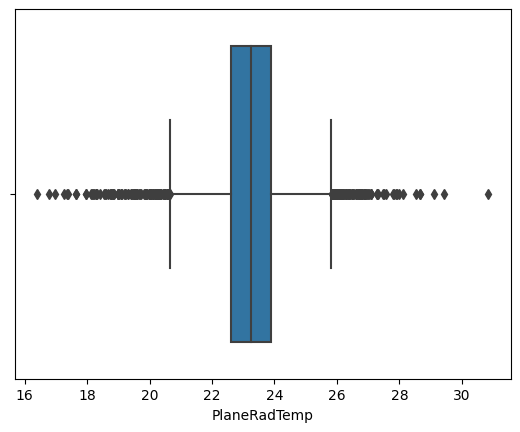

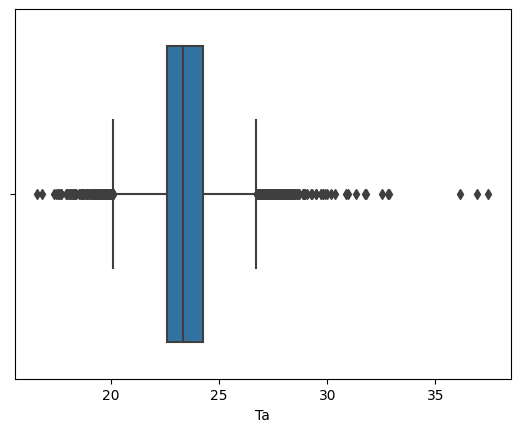

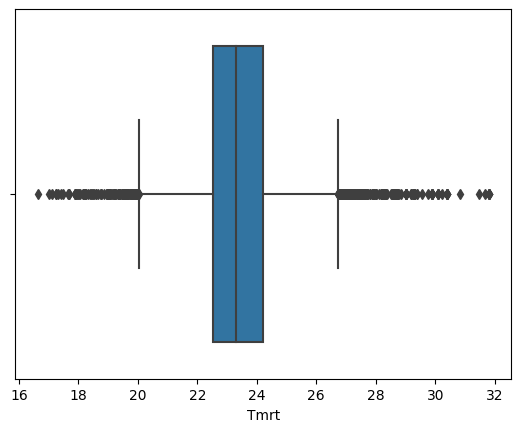

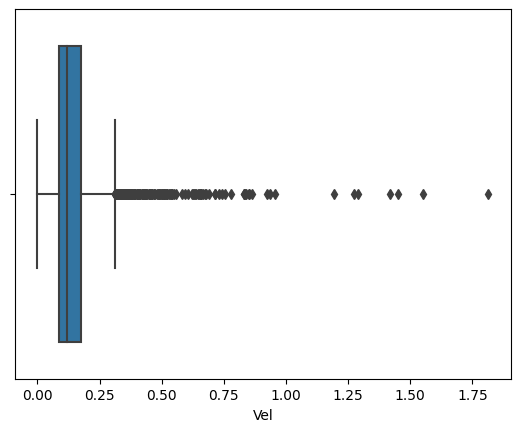

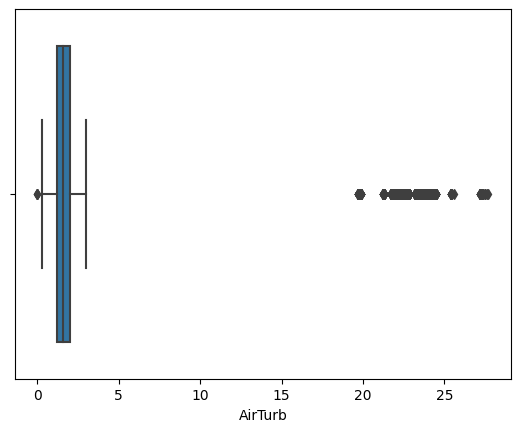

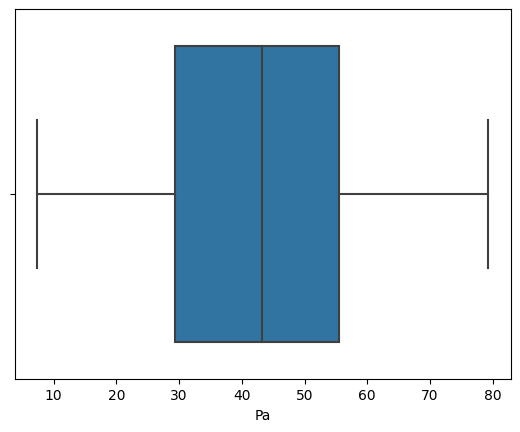

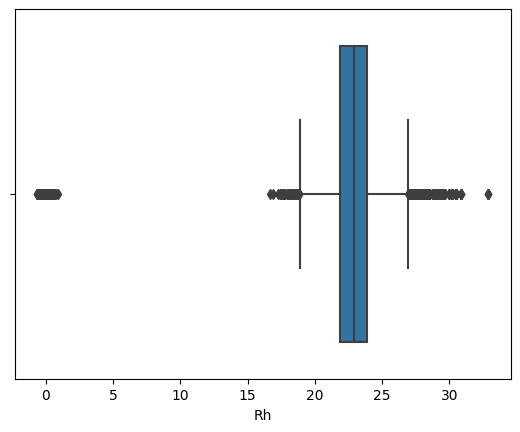

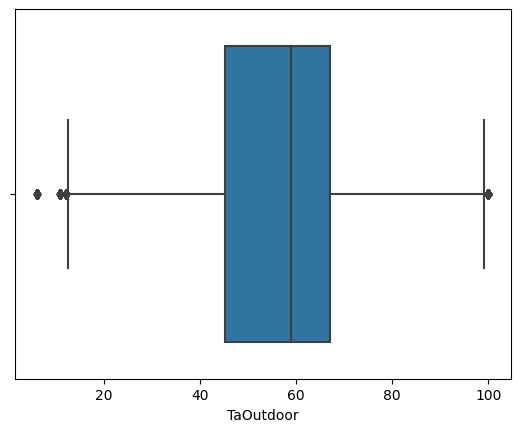

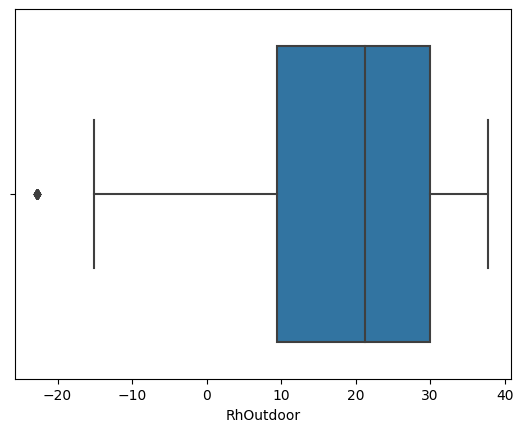

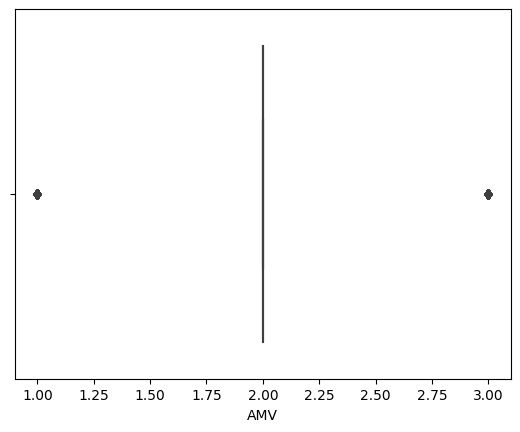

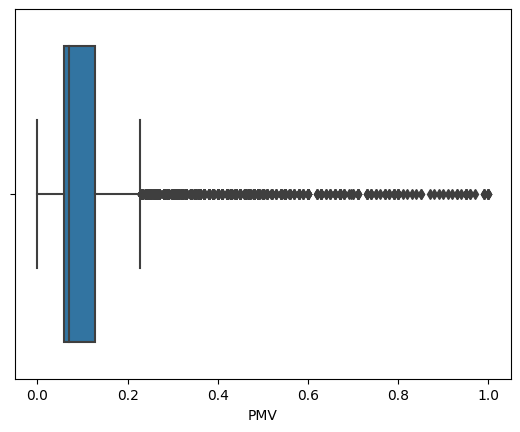

In [ ]:
print("\n-----HISTOGRAM--------\n")

Selecting_the_data.hist(bins=10,figsize = [20 , 15])
plt.show()
print("\n-----BoxPlot--------\n")
for i in range(0,15):
  print("\n")
  sns.boxplot(x=Selecting_the_data[Selecting_the_data.columns[i]])
  plt.show()


# **FILL THE MISSING VALUES**

In [ ]:
#mean_value=Selecting_the_data['Clo'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
Selecting_the_data['Age'] = Selecting_the_data['Age'].fillna(Selecting_the_data['Age']).median()
#print(CollectedData_csv['Age'].isnull().sum())

Selecting_the_data['Clo'] = Selecting_the_data['Clo'].fillna(Selecting_the_data['Clo']).mean()
#print(CollectedData_csv['Age'].isnull().sum())

Selecting_the_data['Met'] = Selecting_the_data['Met'].fillna(Selecting_the_data['Met']).median()
#print(CollectedData_csv['Met'].isnull().sum())

Selecting_the_data['Dewpt'] = Selecting_the_data['Dewpt'].fillna(Selecting_the_data['Dewpt']).median()
#print(CollectedData_csv['Dewpt'].isnull().sum())

Selecting_the_data['PlaneRadTemp'] = Selecting_the_data['PlaneRadTemp'].fillna(Selecting_the_data['PlaneRadTemp']).mean()
#print(CollectedData_csv['PlaneRadTemp'].isnull().sum())

Selecting_the_data['Ta'] = Selecting_the_data['Ta'].fillna(Selecting_the_data['Ta']).median()
#print(CollectedData_csv['Ta'].isnull().sum())

Selecting_the_data['Tmrt'] = Selecting_the_data['Tmrt'].fillna(Selecting_the_data['Tmrt']).mean()
#print(CollectedData_csv['Tmrt'].isnull().sum())

Selecting_the_data['Vel'] = Selecting_the_data['Vel'].fillna(Selecting_the_data['Vel']).median()
#print(CollectedData_csv['Vel'].isnull().sum())

Selecting_the_data['AirTurb'] = Selecting_the_data['AirTurb'].fillna(Selecting_the_data['AirTurb']).median()
#print(CollectedData_csv['AirTurb'].isnull().sum())

Selecting_the_data['Pa'] = Selecting_the_data['Pa'].fillna(Selecting_the_data['Pa']).median()
#print(CollectedData_csv['Pa'].isnull().sum())

Selecting_the_data['Rh'] = Selecting_the_data['Rh'].fillna(Selecting_the_data['Rh']).median()
#print(CollectedData_csv['Rh'].isnull().sum())

Selecting_the_data['TaOutdoor'] = Selecting_the_data['TaOutdoor'].fillna(Selecting_the_data['TaOutdoor']).median()
#print(CollectedData_csv['TaOutdoor'].isnull().sum())

Selecting_the_data['RhOutdoor'] = Selecting_the_data['RhOutdoor'].fillna(Selecting_the_data['RhOutdoor']).median()
#print(CollectedData_csv['RhOutdoor'].isnull().sum())

Selecting_the_data['AMV'] = Selecting_the_data['AMV'].fillna(Selecting_the_data['AMV']).median()
#print(CollectedData_csv['AMV'].isnull().sum())

Selecting_the_data['PMV'] = Selecting_the_data['PMV'].fillna(Selecting_the_data['PMV']).median()
#print(CollectedData_csv['PMV'].isnull().sum())

#Verifying for any missing values
#print("NULL Values After The Insertion Of Missing Values :- ")
#print(Selecting_the_data[['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']].isnull().sum())

Handling The Noisy Data 

In [ ]:
def outliers(data_ , index):
    q1 = data_[index].quantile(0.75)
    q3 = data_[index].quantile(0.25)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr 
    l = data_.index[(data_[index] < lower_bound) | (data_[index] > upper_bound)]
    return l

List = []
for i in ['Age','Clo','Met','Dewpt','PlaneRadTemp','Ta','Tmrt','Vel','AirTurb','Pa','Rh','TaOutdoor','RhOutdoor','AMV','PMV']:
    List.extend(outliers(Selecting_the_data , i))
    
def remove_outliers(data , l):
    l = sorted(set(l))
    data = data.drop(l)
    return data

cleaned = remove_outliers(Selecting_the_data , List)

Applying Filter

In [ ]:
#Question_5
#Applying Filter
variance = Selecting_the_data.var()
columns = Selecting_the_data.columns
v = []

for i in range(0 , len(variance)):
    if variance[i] >= 0.2:
       v.append(columns[i])    

HeatMap

In [ ]:
dataplot = sns.heatmap(Selecting_the_data.corr() , cmap = "Blues" , annot = True , annot_kws = {'size' : 5} )
plt.show()

Entropy And Information Gain

In [ ]:
#Entropy
print("\n----------- Calculate Entropy -----------\n")
for i in range(0,15):
    arr = pd.Series(Selecting_the_data[Selecting_the_data.columns[i]])
    data = arr.value_counts()
    print(list(Selecting_the_data.columns)[i] , (en(data)))


----------- Calculate Entropy -----------

Age 1.38543670204201
Clo 5.779815773075404
Met 5.315458942952617
Dewpt 6.564363046936331
PlaneRadTemp 5.781178199793656
Ta 7.200465447267255
Tmrt 7.575776772749722
Vel 5.28758798624397
AirTurb 7.047655122428716
Pa 7.541916764609086
Rh 4.832469483731833
TaOutdoor 4.8692409186832695
RhOutdoor 5.18088324096252
AMV 0.5640636428069725
PMV 3.580968980312149


In [ ]:
#Information_Gain
print("\n----------- Calculate Information_Gain -----------\n")



----------- Calculate Information_Gain -----------



Part-B
Applying Algorithms

In [ ]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(Selecting_the_data)
print("Normalized Dataset In The Form Of Array :- \n")
print(normalized_data)
print("\n")
print("Normalized data in the form of Data Set : ")
normalized_data = pd.DataFrame(normalized_data , columns = Selecting_the_data.columns)
print(normalized_data)